# Metric Benchmarking Project
The goal of the project is to surface key Property Management metrics, filtered by salient features like management structure or property class, etc. 

Current Metric List:
* Property Acquisition
    * New properties/units YOY, MOM
* Occupancy Rate
    * Days Occupied / 365
* Net Operating Revenue
    * Gross Rents + Oth Inc. - Vacancy Loss - Property Tax - Property Insurance - Property Mgmt Fees - Maintenance & Repairs - Misc. Expenses
* Outstanding Debt
    * ?
* Tenant Turnover (avg duration)
    * AVG Days Occupied
* Days to lease
    * AVG Days Unoccupied
    * Vacancy Loss = Days Unoccupied * Market Daily Rent
* Maintenance
    * Maintenance Costs


- https://www.markdownguide.org/basic-syntax/
- https://nbviewer.jupyter.org/
- https://github.com/bradleywebbappfolio/metric_benchmarking

In [2]:
import pandas as pd
import math

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [3]:
csv_file = '/Users/bradley.webb/Downloads/personas_input_data.csv'

In [4]:
df = pd.read_csv(csv_file)

In [9]:
df.shape

(14391, 101)

In [47]:
df[['TOTAL_MONTNLY_RENT_REV']].max()

Index(['TOTAL_MONTNLY_RENT_REV'], dtype='object')

In [19]:
df['MEDIAN_TENANCY_DAYS'].mean()

1201.335077408257

In [43]:
df['CUSTOMER_TENURE_YEARS'].min()

-10.246575

In [61]:
df['STRUCTURE'].value_counts()

Fee Manager                                                                                    5464
Owner/Operator                                                                                 4058
Owner/Operator & Fee Manager                                                                   1722
Unknown                                                                                        1530
Investment Manager                                                                              444
Investment Manager & Owner/Operator                                                             424
Investment Manager & Fee Manager                                                                257
Investment Manager & Fee Manager & Owner/Operator                                               231
Fee Manager & Owner/Operator                                                                    197
Self Managed HOA                                                                                 30


In [70]:
df.groupby('BILLING_STATE')['AVG_UNIT_MARKET_RENT'].mean()

BILLING_STATE
AB                   1674.772727
AK                   1601.015433
AL                    882.140822
AR                   1160.101539
AZ                   1107.121714
BC                   2119.231281
CA                   1975.943425
CO                   4190.940157
CT                   3360.078396
DC                   2475.709418
DE                   3623.964693
FL                   2053.908340
GA                   1087.012721
GU                   1321.741242
HI                   2284.852092
IA                    866.869553
ID                    974.736217
IL                   1615.620222
IN                    920.592167
KS                   1191.982344
KY                    911.607871
LA                   1088.760045
MA                   1824.290946
MD                   1568.068560
ME                   1238.852662
MI                   1258.709980
MN                   1049.388550
MO                   1054.970106
MS                    907.954115
MT                   1073.462

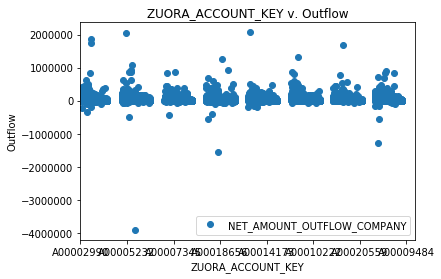

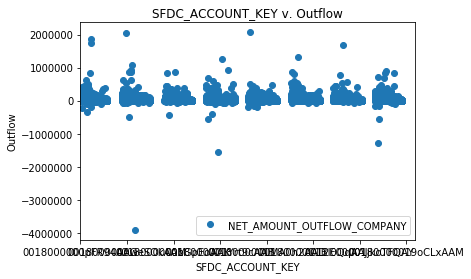

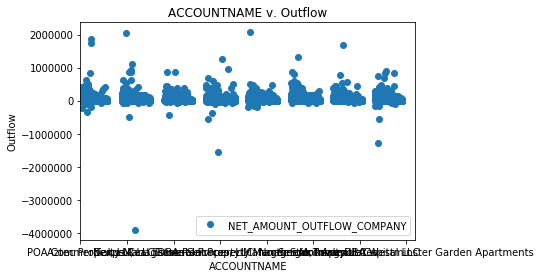

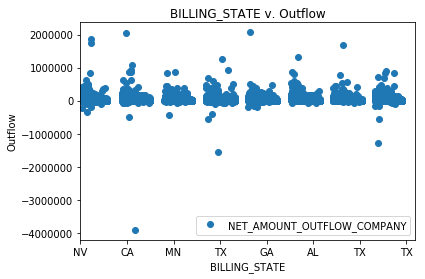

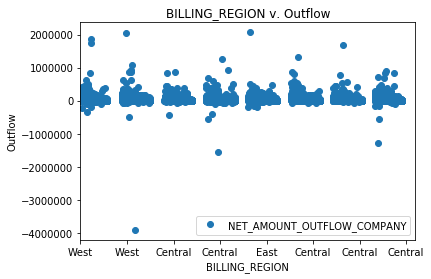

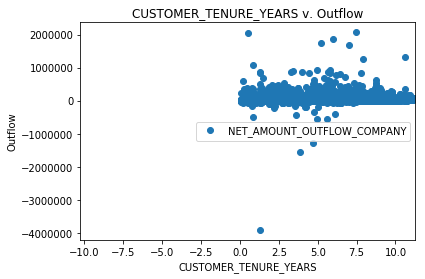

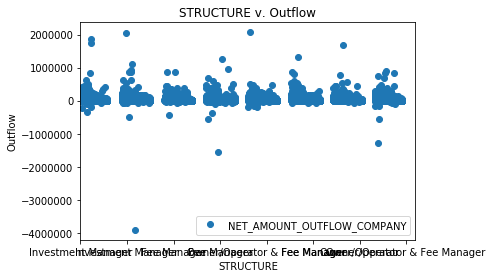

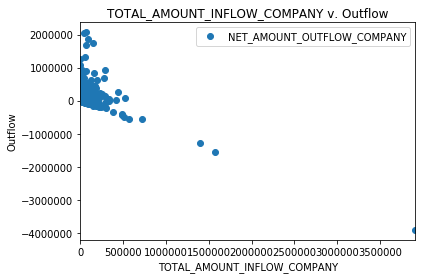

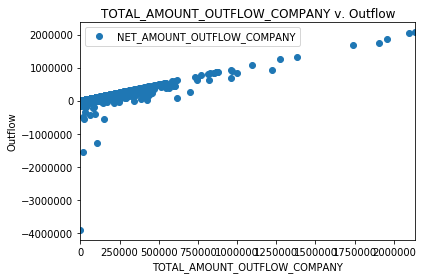

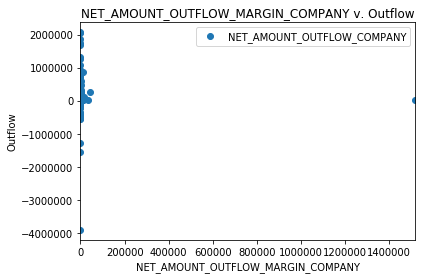

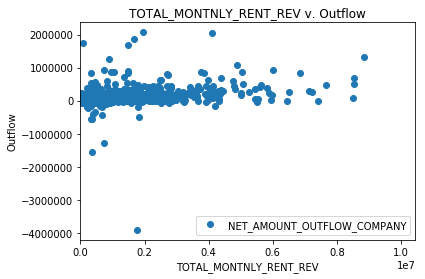

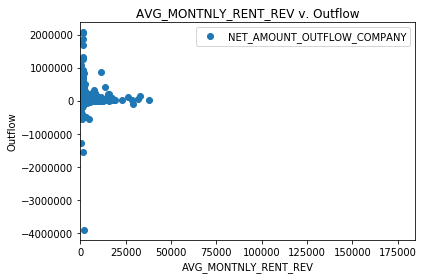

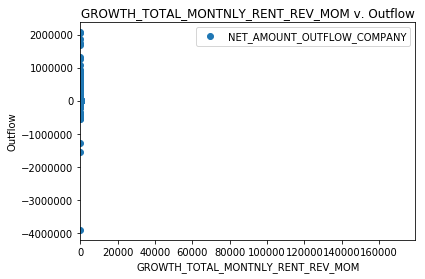

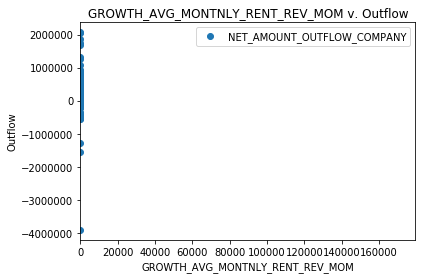

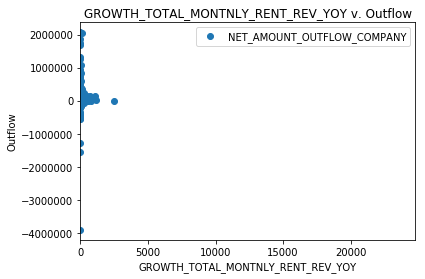

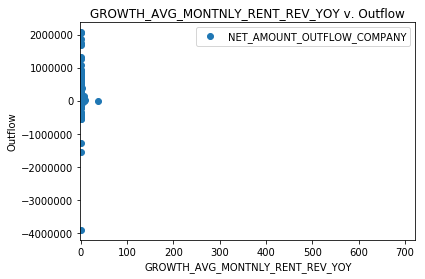

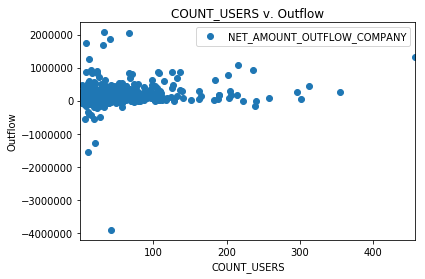

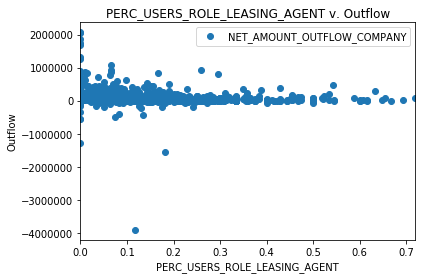

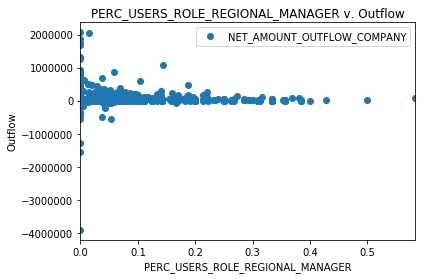

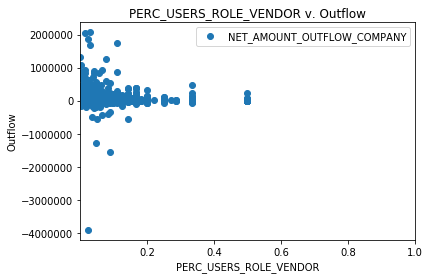

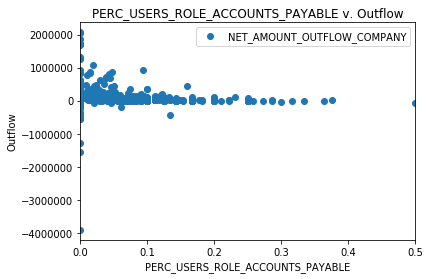

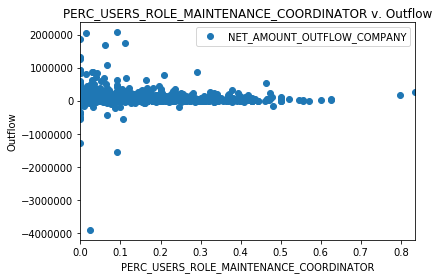

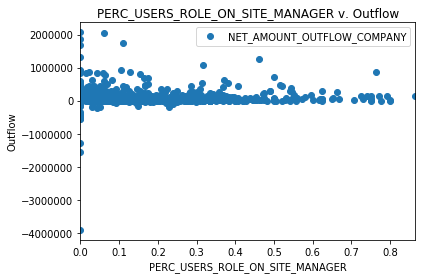

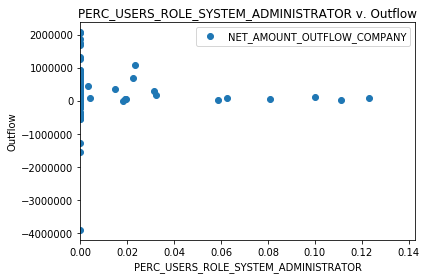

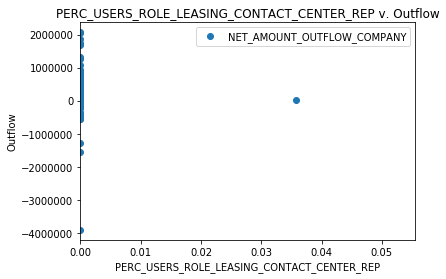

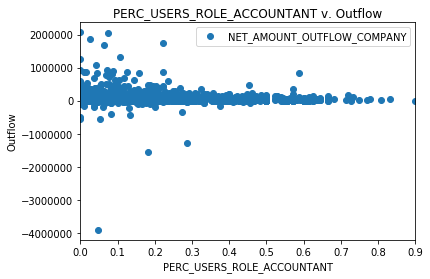

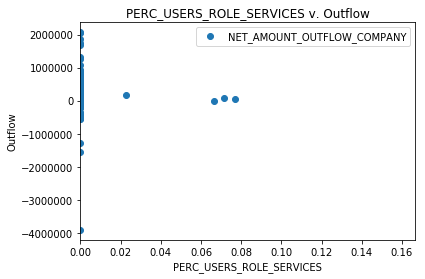

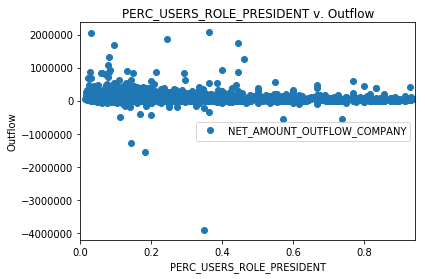

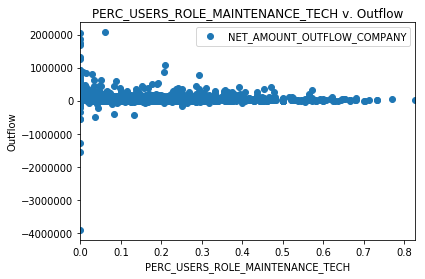

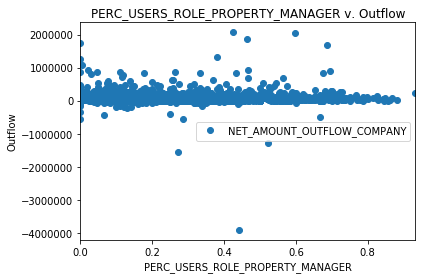

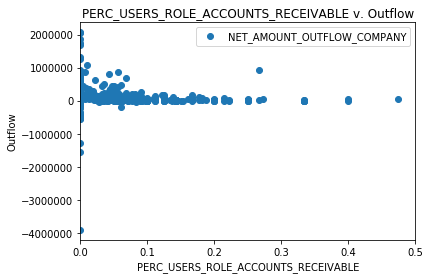

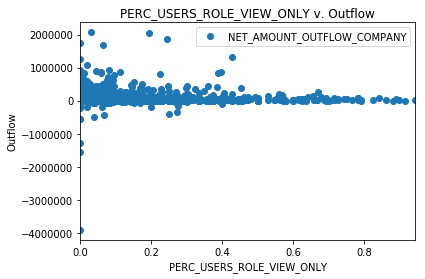

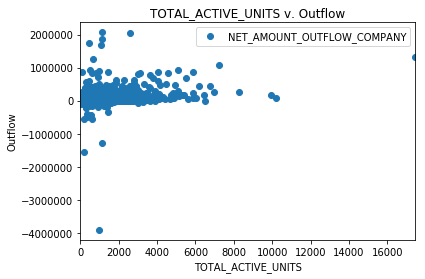

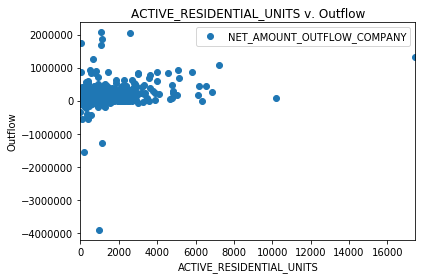

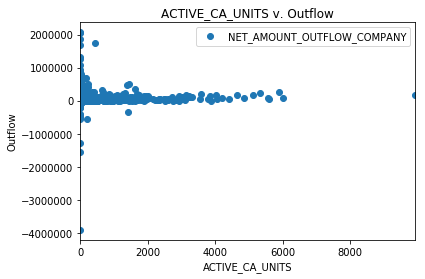

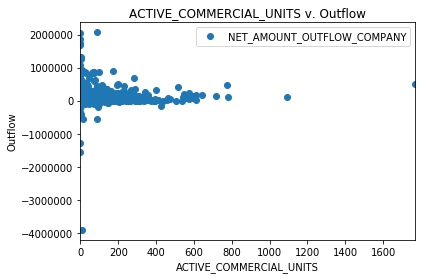

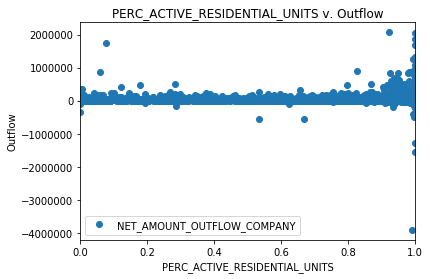

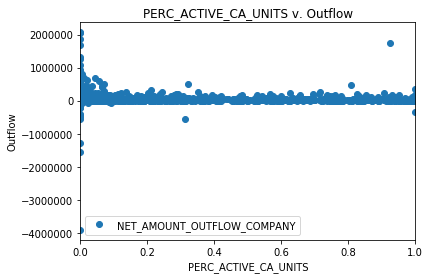

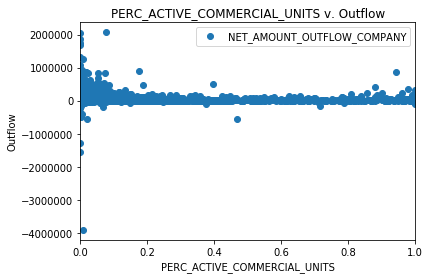

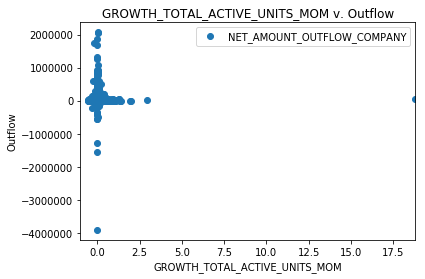

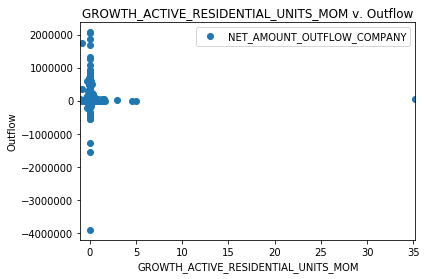

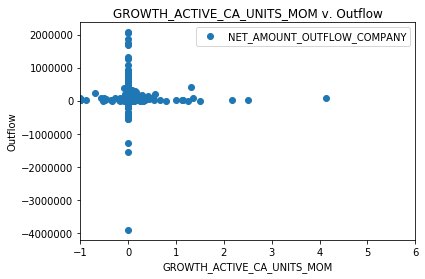

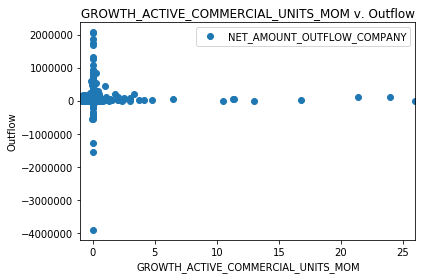

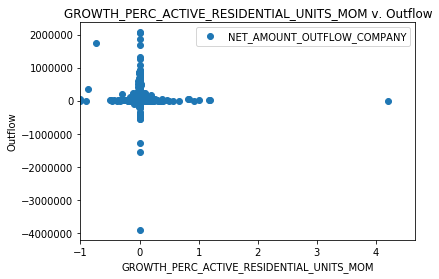

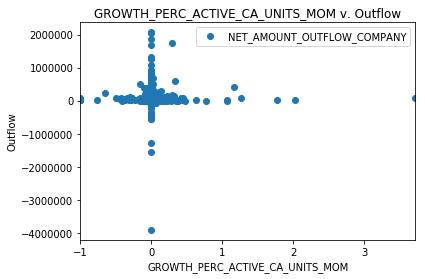

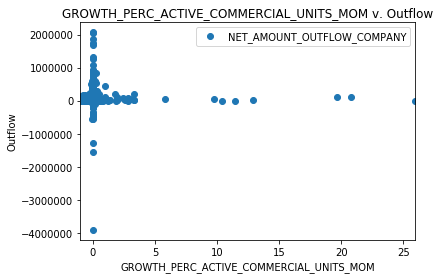

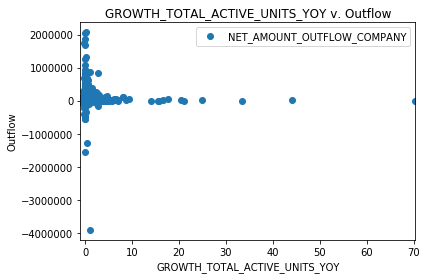

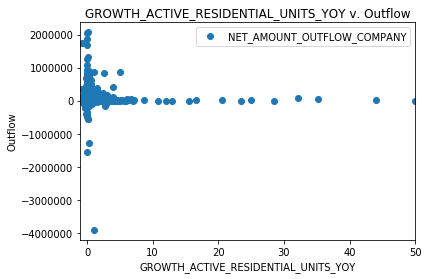

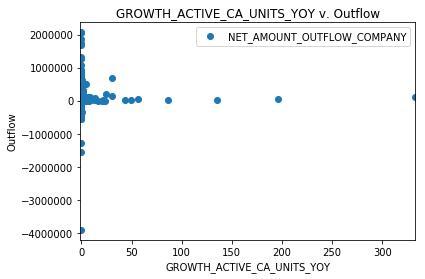

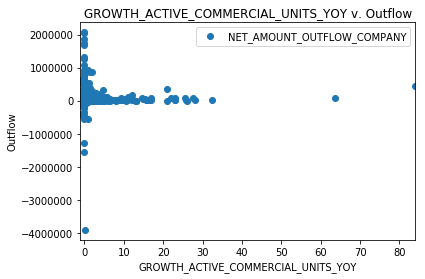

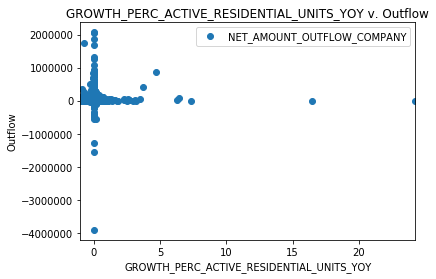

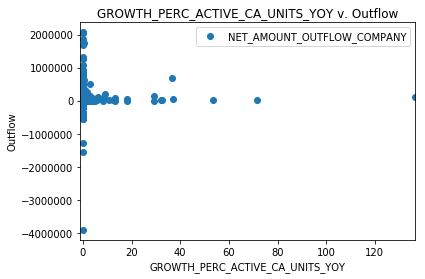

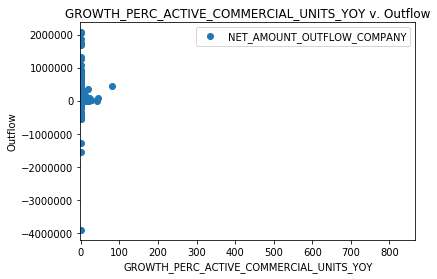

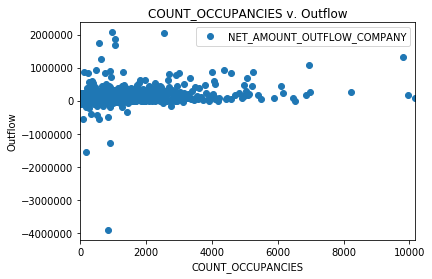

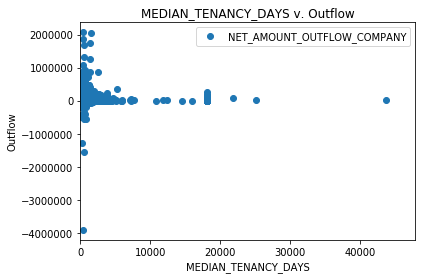

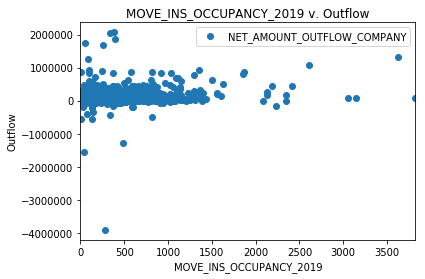

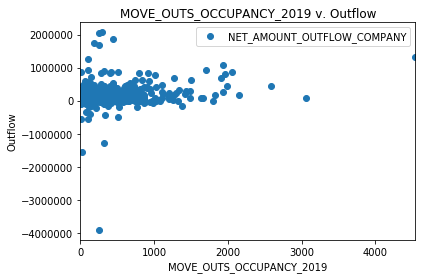

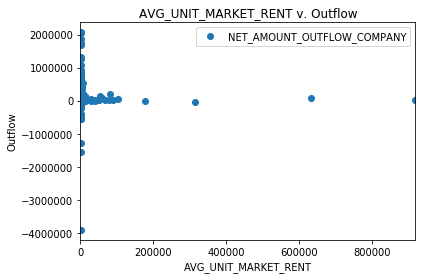

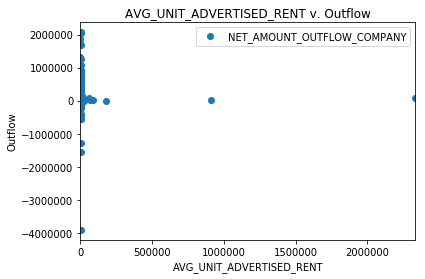

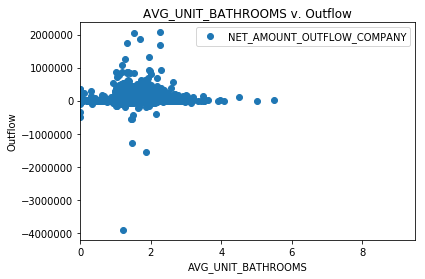

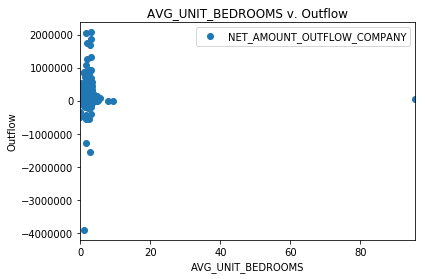

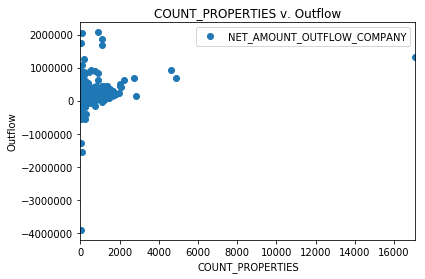

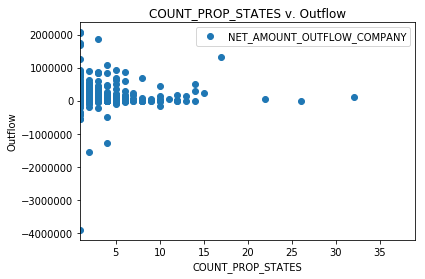

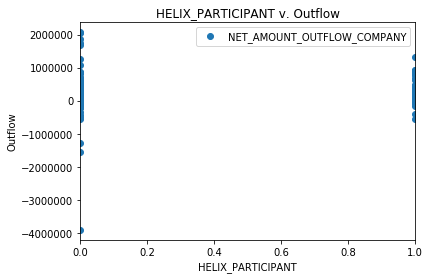

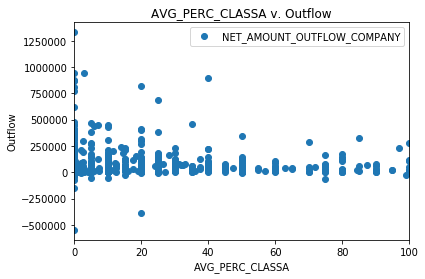

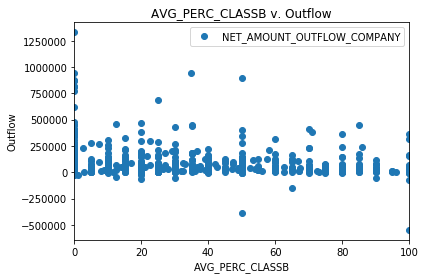

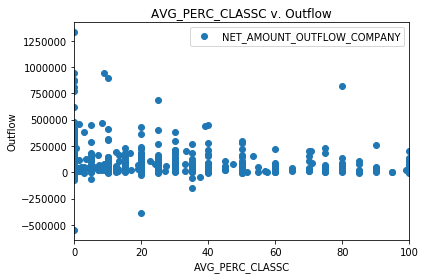

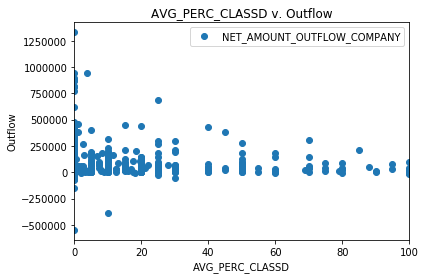

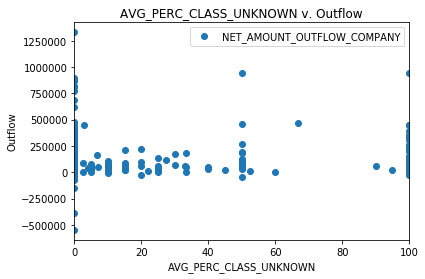

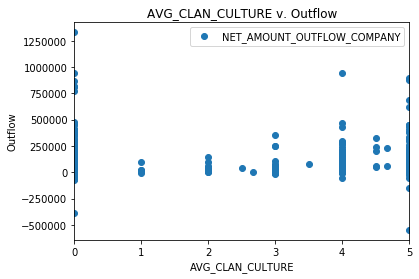

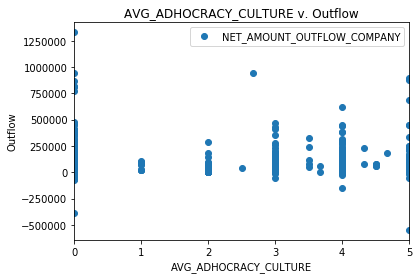

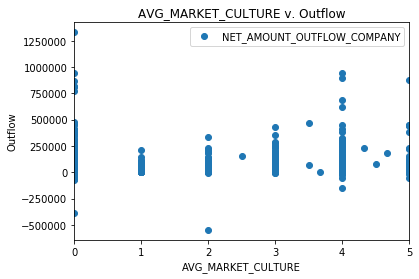

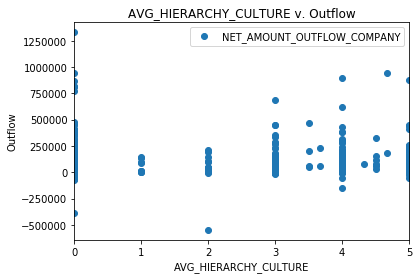

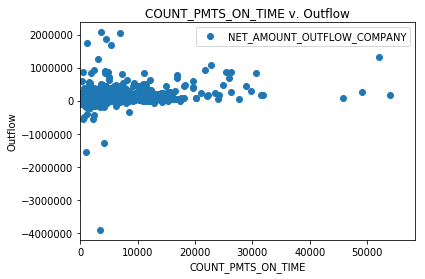

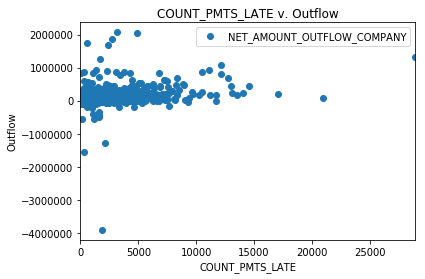

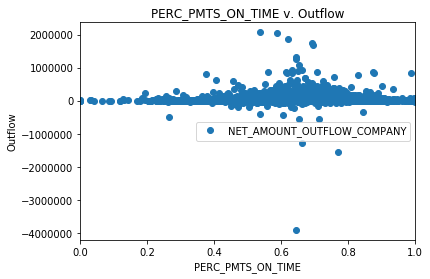

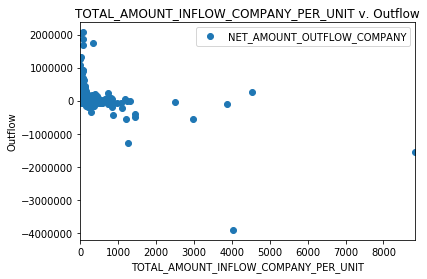

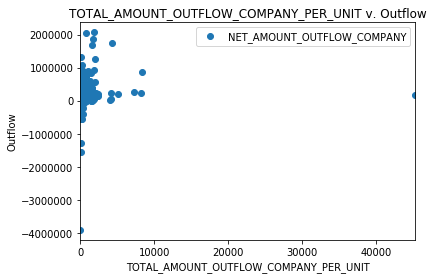

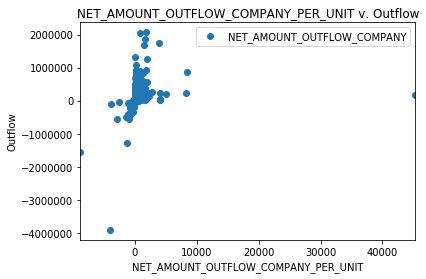

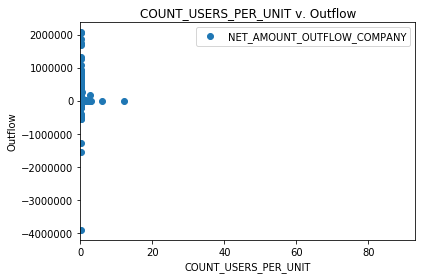

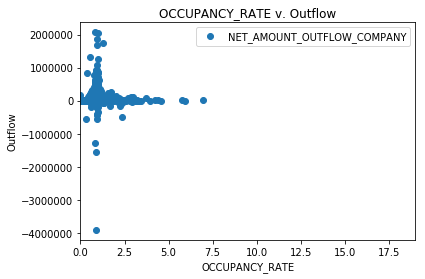

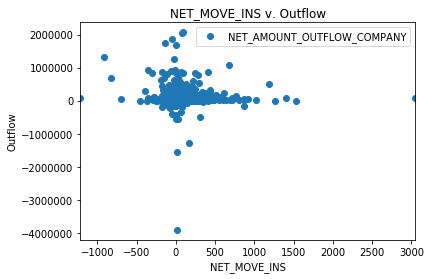

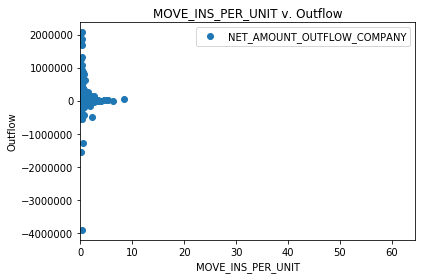

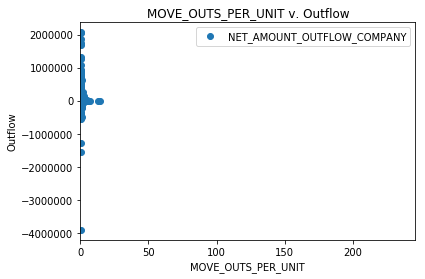

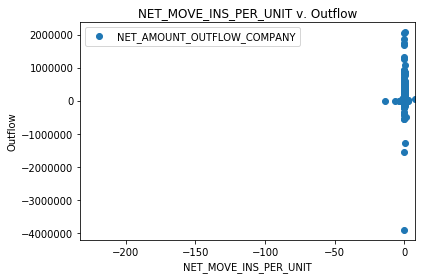

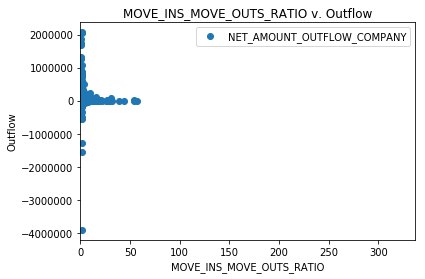

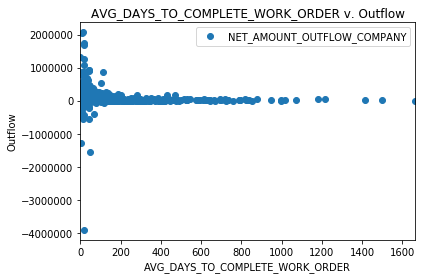

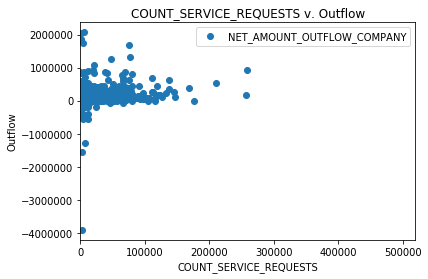

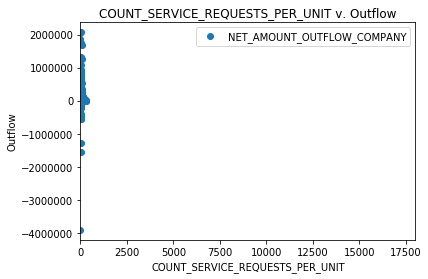

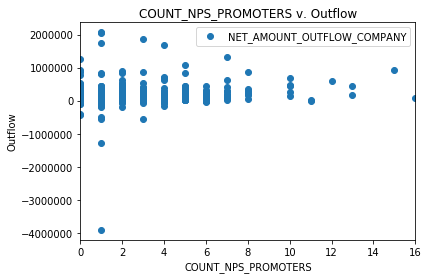

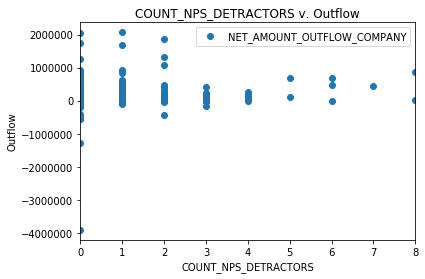

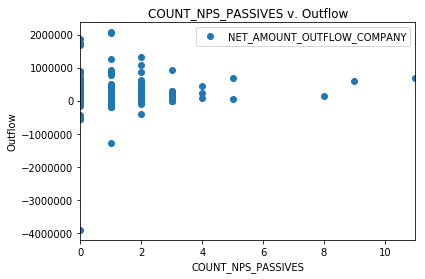

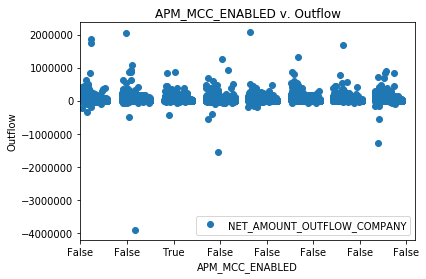

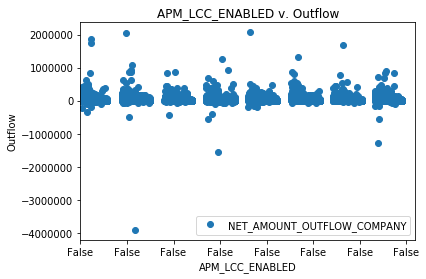

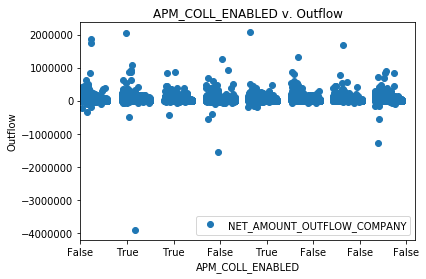

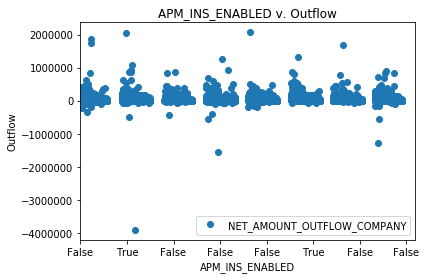

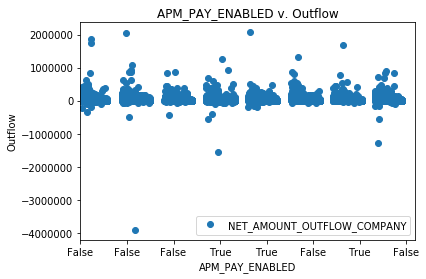

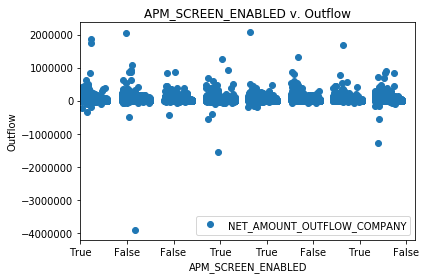

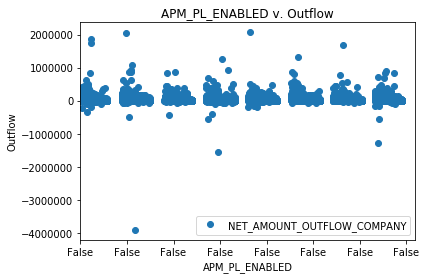

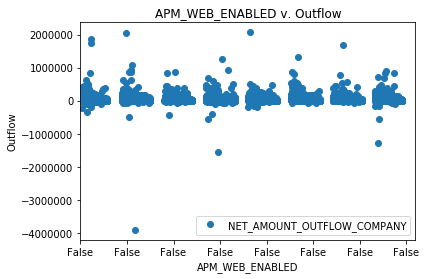

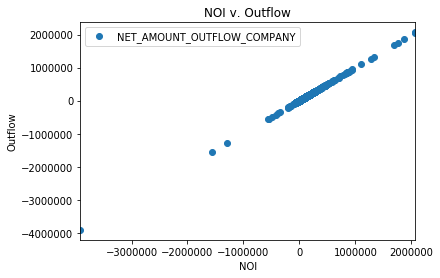

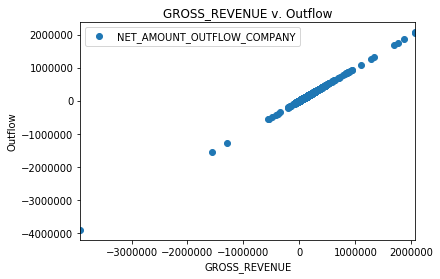

In [41]:
for col in df.columns:
    if col != 'NET_AMOUNT_OUTFLOW_COMPANY':
        df.plot(x=col, y='NET_AMOUNT_OUTFLOW_COMPANY', style='o')
        plt.title('{} v. Outflow'.format(col))
        plt.xlabel('{}'.format(col))
        plt.ylabel('Outflow')
        plt.show()

In [78]:
df[df['OCCUPANCY_RATE'] > 1.0]['OCCUPANCY_RATE'].count()

1116

In [117]:
df[['GROWTH_TOTAL_MONTNLY_RENT_REV_MOM',
     'GROWTH_AVG_MONTNLY_RENT_REV_MOM',
     'GROWTH_TOTAL_MONTNLY_RENT_REV_YOY',
     'GROWTH_AVG_MONTNLY_RENT_REV_YOY']].loc[df['BILLING_STATE']=='TX'].max()

GROWTH_TOTAL_MONTNLY_RENT_REV_MOM    179504.000000
GROWTH_AVG_MONTNLY_RENT_REV_MOM      179504.000000
GROWTH_TOTAL_MONTNLY_RENT_REV_YOY      1063.729055
GROWTH_AVG_MONTNLY_RENT_REV_YOY           7.190223
dtype: float64

In [118]:
df.groupby('BILLING_STATE')\
    [
    ['GROWTH_TOTAL_MONTNLY_RENT_REV_MOM',
     'GROWTH_AVG_MONTNLY_RENT_REV_MOM',
     'GROWTH_TOTAL_MONTNLY_RENT_REV_YOY',
     'GROWTH_AVG_MONTNLY_RENT_REV_YOY']
].median()

,GROWTH_TOTAL_MONTNLY_RENT_REV_MOM,GROWTH_AVG_MONTNLY_RENT_REV_MOM,GROWTH_TOTAL_MONTNLY_RENT_REV_YOY,GROWTH_AVG_MONTNLY_RENT_REV_YOY
BILLING_STATE,,,,
AB,3.315868,-0.040918,3.302985,-0.043781
AK,0.000000,-0.000206,0.000000,0.000000
AL,0.013803,0.009532,0.039793,0.000000
AR,0.026833,0.006225,0.072251,0.014821
AZ,0.037064,0.011564,0.050557,0.049391
BC,0.059314,-0.061485,2.267250,0.067588
CA,0.015541,0.004856,0.070174,0.031786
CO,0.025421,0.007609,0.085934,0.038191
CT,-0.005473,-0.010776,0.060749,0.000000


In [126]:
df[df['TOTAL_ACTIVE_UNITS'] == 0]   # ['TOTAL_ACTIVE_UNITS'].count()

,ZUORA_ACCOUNT_KEY,SFDC_ACCOUNT_KEY,ACCOUNTNAME,BILLING_STATE,BILLING_REGION,CUSTOMER_TENURE_YEARS,STRUCTURE,TOTAL_AMOUNT_INFLOW_COMPANY,TOTAL_AMOUNT_OUTFLOW_COMPANY,NET_AMOUNT_OUTFLOW_COMPANY,...,COUNT_NPS_DETRACTORS,COUNT_NPS_PASSIVES,APM_MCC_ENABLED,APM_LCC_ENABLED,APM_COLL_ENABLED,APM_INS_ENABLED,APM_PAY_ENABLED,APM_SCREEN_ENABLED,APM_PL_ENABLED,APM_WEB_ENABLED
1255,A00020087,0018000001gcob0AAA,Urban Property Management Corporation DBA The ...,NY,East,-10.246575,Fee Manager,NaN,NaN,NaN,...,NaN,NaN,False,False,False,False,False,False,False,False
1265,A00005151,0018000000UW684AAD,Executive Home Management (EHM),NC,East,6.849315,Fee Manager,NaN,NaN,NaN,...,0.0,1.0,False,False,True,True,False,False,False,False
1396,A00021475,0012E00001opkiWQAQ,VTC Square Investors LLC,CA,West,-10.246575,Owner/Operator,NaN,NaN,NaN,...,NaN,NaN,False,False,False,False,False,False,False,False
1409,A00021963,00180000010e7pGAAQ,W. Knapp Limited DBA RE/MAX Space Center,TX,Central,-10.246575,Fee Manager,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1442,A00021338,0018000000xH4hxAAC,Haik Real Estate Group LLC DBA Abek Real Estate,LA,Central,-10.246575,Fee Manager,NaN,NaN,NaN,...,NaN,NaN,False,False,False,False,False,False,False,False
1457,A00021620,0018000001dRqfGAAS,"CLM Real Estate, LLC",WI,Central,-0.071233,Owner/Operator & Fee Manager,NaN,NaN,NaN,...,NaN,NaN,False,False,False,False,False,False,False,False
1499,A00021645,0018000001WgWs2AAF,Providence Point Inc,WA,West,-0.153425,Self Managed HOA,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1549,A00021678,0012E00001rwcJBQAY,Russell Properties Management Group LLC,FL,East,-10.246575,Owner/Operator,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1579,A00012483,0018000001LoanTAAR,"Sunshine Property Management Group, LLC",GA,East,4.016438,Owner/Operator,NaN,NaN,NaN,...,NaN,NaN,False,False,False,False,True,True,False,False
1643,A00002784,0018000000UW5imAAD,"L. Moore Property Management, Inc.",OR,West,11.271233,Unknown,NaN,NaN,NaN,...,NaN,NaN,False,False,False,False,False,False,False,False


In [30]:
df['GROSS_REVENUE'] = df['TOTAL_AMOUNT_OUTFLOW_COMPANY'] - df['TOTAL_AMOUNT_INFLOW_COMPANY']

In [29]:
df['COUNT_USERS'].std()

15.49914985638348

In [33]:
df[['NET_AMOUNT_OUTFLOW_COMPANY',
'NET_AMOUNT_OUTFLOW_MARGIN_COMPANY']]

,NET_AMOUNT_OUTFLOW_COMPANY,NET_AMOUNT_OUTFLOW_MARGIN_COMPANY
0,24158.85,4.890314
1,-6000.36,0.000000
2,24765.21,0.000000
3,57072.29,2.545000
4,332549.25,3.864203
5,30805.98,0.000000
6,14361.66,1.997337
7,60050.73,4.880500
8,129571.71,0.000000
9,0.00,1.000000


In [34]:
df.describe()

,CUSTOMER_TENURE_YEARS,TOTAL_AMOUNT_INFLOW_COMPANY,TOTAL_AMOUNT_OUTFLOW_COMPANY,NET_AMOUNT_OUTFLOW_COMPANY,NET_AMOUNT_OUTFLOW_MARGIN_COMPANY,TOTAL_MONTNLY_RENT_REV,AVG_MONTNLY_RENT_REV,GROWTH_TOTAL_MONTNLY_RENT_REV_MOM,GROWTH_AVG_MONTNLY_RENT_REV_MOM,GROWTH_TOTAL_MONTNLY_RENT_REV_YOY,...,NET_MOVE_INS_PER_UNIT,MOVE_INS_MOVE_OUTS_RATIO,AVG_DAYS_TO_COMPLETE_WORK_ORDER,COUNT_SERVICE_REQUESTS,COUNT_SERVICE_REQUESTS_PER_UNIT,COUNT_NPS_PROMOTERS,COUNT_NPS_DETRACTORS,COUNT_NPS_PASSIVES,NOI,GROSS_REVENUE
count,14308.000000,9.734000e+03,9.734000e+03,9.734000e+03,9.734000e+03,1.350800e+04,13508.000000,13508.000000,13508.000000,13508.000000,...,14391.000000,14391.000000,11025.000000,13291.000000,14391.000000,5544.000000,5544.000000,5544.000000,9.734000e+03,9.734000e+03
mean,3.617442,8.953005e+03,4.313673e+04,3.418372e+04,1.855346e+02,3.453605e+05,1360.303527,15.973132,13.628315,9.181776,...,0.013302,2.117682,35.075039,4521.461440,14.612533,1.095418,0.296176,0.322511,3.418372e+04,3.418372e+04
std,2.733667,5.181957e+04,8.644293e+04,9.165727e+04,1.539397e+04,5.584657e+05,2904.600162,1553.957647,1544.663433,221.056389,...,1.961208,8.290037,72.570225,12131.615549,179.745651,1.204397,0.623041,0.609527,9.165727e+04,9.165727e+04
min,-10.246575,0.000000e+00,0.000000e+00,-3.912240e+06,0.000000e+00,1.200000e-01,0.018750,-0.999955,-0.999887,-0.999555,...,-232.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-3.912240e+06,-3.912240e+06
25%,1.600000,0.000000e+00,7.110865e+03,5.604047e+03,0.000000e+00,8.014668e+04,681.152455,-0.051160,-0.034414,-0.032015,...,-0.014844,0.892756,11.390244,165.000000,0.863636,0.000000,0.000000,0.000000,5.604047e+03,5.604047e+03
50%,3.515068,7.705000e+02,2.038415e+04,1.677931e+04,1.663702e-01,1.778986e+05,973.069521,0.019615,0.007592,0.065909,...,0.015504,1.087912,20.254902,920.000000,4.828947,1.000000,0.000000,0.000000,1.677931e+04,1.677931e+04
75%,5.350685,7.011250e+03,4.709561e+04,3.843515e+04,3.926165e+00,3.847586e+05,1386.603862,0.099829,0.053282,0.297901,...,0.071429,1.441860,33.666667,3938.500000,14.102121,1.000000,0.000000,1.000000,3.843515e+04,3.843515e+04
max,11.271233,3.912240e+06,2.137567e+06,2.068655e+06,1.517577e+06,1.044891e+07,184696.420000,179504.000000,179504.000000,24789.816400,...,7.771429,337.000000,1665.000000,519211.000000,18015.000000,16.000000,8.000000,11.000000,2.068655e+06,2.068655e+06


In [8]:
for col in df.columns:
    print(col)

ZUORA_ACCOUNT_KEY
SFDC_ACCOUNT_KEY
ACCOUNTNAME
BILLING_STATE
BILLING_REGION
CUSTOMER_TENURE_YEARS
STRUCTURE
TOTAL_AMOUNT_INFLOW_COMPANY
TOTAL_AMOUNT_OUTFLOW_COMPANY
NET_AMOUNT_OUTFLOW_COMPANY
NET_AMOUNT_OUTFLOW_MARGIN_COMPANY
TOTAL_MONTNLY_RENT_REV
AVG_MONTNLY_RENT_REV
GROWTH_TOTAL_MONTNLY_RENT_REV_MOM
GROWTH_AVG_MONTNLY_RENT_REV_MOM
GROWTH_TOTAL_MONTNLY_RENT_REV_YOY
GROWTH_AVG_MONTNLY_RENT_REV_YOY
COUNT_USERS
PERC_USERS_ROLE_LEASING_AGENT
PERC_USERS_ROLE_REGIONAL_MANAGER
PERC_USERS_ROLE_VENDOR
PERC_USERS_ROLE_ACCOUNTS_PAYABLE
PERC_USERS_ROLE_MAINTENANCE_COORDINATOR
PERC_USERS_ROLE_ON_SITE_MANAGER
PERC_USERS_ROLE_SYSTEM_ADMINISTRATOR
PERC_USERS_ROLE_LEASING_CONTACT_CENTER_REP
PERC_USERS_ROLE_ACCOUNTANT
PERC_USERS_ROLE_SERVICES
PERC_USERS_ROLE_PRESIDENT
PERC_USERS_ROLE_MAINTENANCE_TECH
PERC_USERS_ROLE_PROPERTY_MANAGER
PERC_USERS_ROLE_ACCOUNTS_RECEIVABLE
PERC_USERS_ROLE_VIEW_ONLY
TOTAL_ACTIVE_UNITS
ACTIVE_RESIDENTIAL_UNITS
ACTIVE_CA_UNITS
ACTIVE_COMMERCIAL_UNITS
PERC_ACTIVE_RESIDENTIAL_U